In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

# Import

In [2]:
data = pd.read_csv('../data/dax_indicator_2000_2024.csv')
data.head()

,Date,volume,direction_num,direction,sma_3,rsi_3,rsi_7,rsi_14,BBB_3_2.0,BBP_3_2.0,...,pos_ema_14,pos_BBL_3_2.0,pos_BBM_3_2.0,pos_BBU_3_2.0,pos_BBL_7_2.0,pos_BBM_7_2.0,pos_BBU_7_2.0,pos_BBL_14_2.0,pos_BBM_14_2.0,pos_BBU_14_2.0
0,2000-02-18,52728400,-10.610352,0,7488.993164,59.830213,59.650151,60.567120,4.021197,5.459555,...,0,0,0,1,0,0,1,0,0,1
1,2000-02-21,24404000,22.189941,1,7548.209798,58.108209,59.105378,60.291178,2.174134,4.021197,...,0,0,0,1,0,1,1,0,0,1
2,2000-02-22,51082700,27.560059,1,7581.613118,62.161855,60.158780,60.768826,0.363033,2.174134,...,0,0,1,1,0,0,1,0,0,1
3,2000-02-23,42673800,79.140137,1,7590.749837,67.122070,61.365586,61.290040,0.734931,0.363033,...,0,0,0,0,0,0,1,0,0,1
4,2000-02-24,38686700,-56.390137,0,7632.479980,83.788987,67.390827,63.984327,2.491977,0.734931,...,0,0,0,1,0,0,1,0,0,1


In [3]:
data.drop('Date', axis=1, inplace=True)
data.head()

,volume,direction_num,direction,sma_3,rsi_3,rsi_7,rsi_14,BBB_3_2.0,BBP_3_2.0,BBB_7_2.0,...,pos_ema_14,pos_BBL_3_2.0,pos_BBM_3_2.0,pos_BBU_3_2.0,pos_BBL_7_2.0,pos_BBM_7_2.0,pos_BBU_7_2.0,pos_BBL_14_2.0,pos_BBM_14_2.0,pos_BBU_14_2.0
0,52728400,-10.610352,0,7488.993164,59.830213,59.650151,60.567120,4.021197,5.459555,5.130389,...,0,0,0,1,0,0,1,0,0,1
1,24404000,22.189941,1,7548.209798,58.108209,59.105378,60.291178,2.174134,4.021197,5.026563,...,0,0,0,1,0,1,1,0,0,1
2,51082700,27.560059,1,7581.613118,62.161855,60.158780,60.768826,0.363033,2.174134,4.147068,...,0,0,1,1,0,0,1,0,0,1
3,42673800,79.140137,1,7590.749837,67.122070,61.365586,61.290040,0.734931,0.363033,4.128267,...,0,0,0,0,0,0,1,0,0,1
4,38686700,-56.390137,0,7632.479980,83.788987,67.390827,63.984327,2.491977,0.734931,4.680505,...,0,0,0,1,0,0,1,0,0,1


# X y validation Split

In [4]:
y = data[['direction']]
X = data.drop(['direction','direction_num'],axis=1) #

In [5]:
X.head()

,volume,sma_3,rsi_3,rsi_7,rsi_14,BBB_3_2.0,BBP_3_2.0,BBB_7_2.0,BBP_7_2.0,BBB_14_2.0,...,pos_ema_14,pos_BBL_3_2.0,pos_BBM_3_2.0,pos_BBU_3_2.0,pos_BBL_7_2.0,pos_BBM_7_2.0,pos_BBU_7_2.0,pos_BBL_14_2.0,pos_BBM_14_2.0,pos_BBU_14_2.0
0,52728400,7488.993164,59.830213,59.650151,60.567120,4.021197,5.459555,5.130389,5.163819,13.074441,...,0,0,0,1,0,0,1,0,0,1
1,24404000,7548.209798,58.108209,59.105378,60.291178,2.174134,4.021197,5.026563,5.130389,9.891575,...,0,0,0,1,0,1,1,0,0,1
2,51082700,7581.613118,62.161855,60.158780,60.768826,0.363033,2.174134,4.147068,5.026563,7.812410,...,0,0,1,1,0,0,1,0,0,1
3,42673800,7590.749837,67.122070,61.365586,61.290040,0.734931,0.363033,4.128267,4.147068,6.159206,...,0,0,0,0,0,0,1,0,0,1
4,38686700,7632.479980,83.788987,67.390827,63.984327,2.491977,0.734931,4.680505,4.128267,5.911273,...,0,0,0,1,0,0,1,0,0,1


#### Imput the list of position columns

In [6]:
cat_col_names = pd.read_csv('../data/temp_cat_col_names.csv')
cat_col_names.drop('Unnamed: 0', axis=1, inplace=True)
cat_col_names = cat_col_names['0'].tolist()
cat_col_names

['pos_sma_3',
 'pos_sma_7',
 'pos_sma_14',
 'pos_ema_3',
 'pos_ema_7',
 'pos_ema_14',
 'pos_BBL_3_2.0',
 'pos_BBM_3_2.0',
 'pos_BBU_3_2.0',
 'pos_BBL_7_2.0',
 'pos_BBM_7_2.0',
 'pos_BBU_7_2.0',
 'pos_BBL_14_2.0',
 'pos_BBM_14_2.0',
 'pos_BBU_14_2.0']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=99, shuffle=False)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=False)

# Checking Shapes

In [9]:
X_train.shape, y_train.shape

((4373, 43), (4373, 1))

In [10]:
X_test.shape, y_test.shape

((1094, 43), (1094, 1))

In [11]:
X_val.shape, y_val.shape

((608, 43), (608, 1))

# Random Forest

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier

In [13]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train['direction'])

RandomForestClassifier()

In [14]:
y_train_pred = rfc.predict(X_train)
y_test_pred  = rfc.predict(X_test)
y_val_pred  = rfc.predict(X_val)

# Results

##  Confusion Matrix Train Set

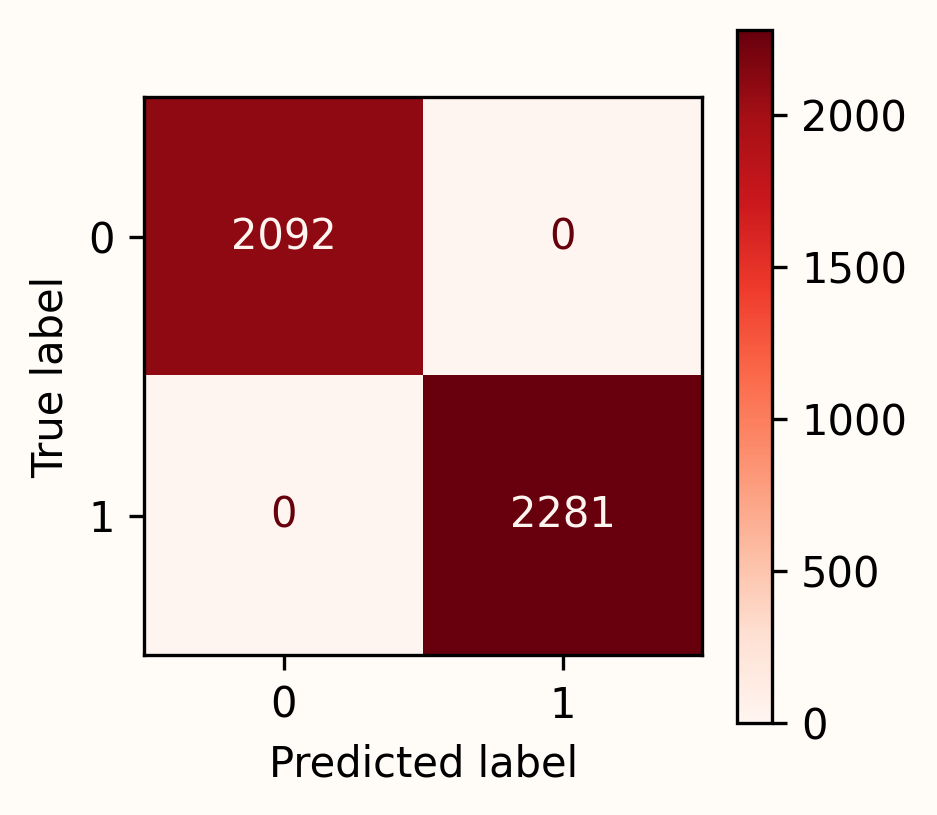

In [15]:
fig, ax = plt.subplots(1,1, figsize=(3,3), dpi=300)
cm_train = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(cm_train, display_labels=rfc.classes_)
fig.set_facecolor('#FFFCF7')
ax.set_facecolor('#FFFCF7')
disp.plot(cmap='Reds', ax=ax)
#plt.savefig("../plots/ConfusionMatrixTrain_rf.png")

## Confusion Matrix Test Set

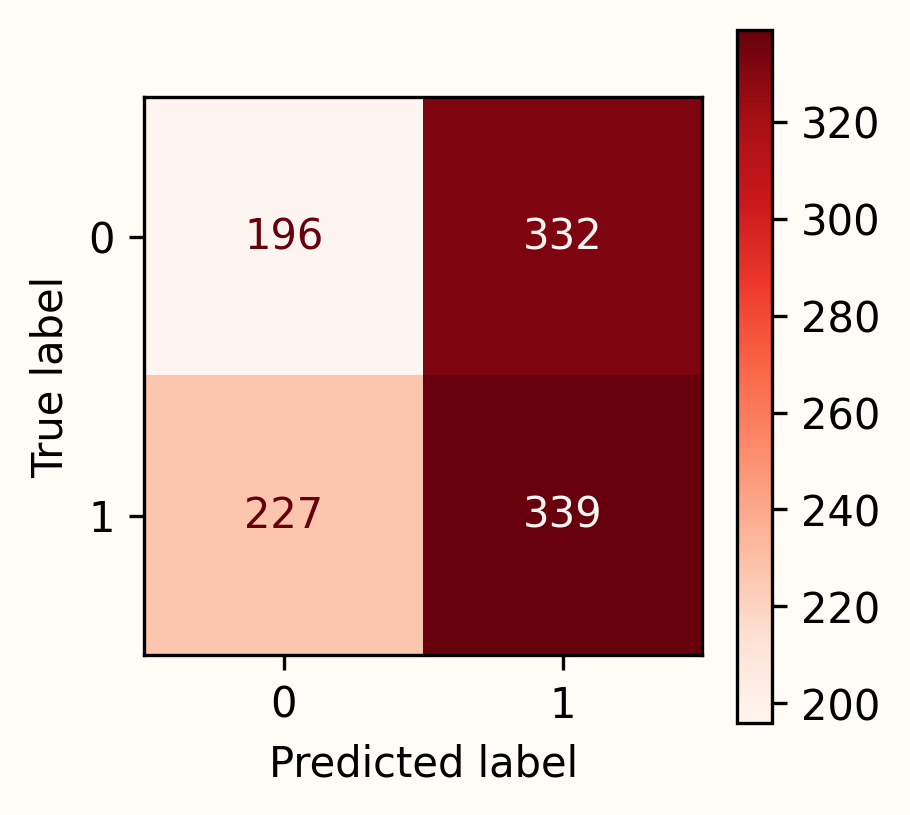

In [16]:
fig, ax = plt.subplots(1,1, figsize=(3,3), dpi=300)
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm_test, display_labels=rfc.classes_)
fig.set_facecolor('#FFFCF7')
ax.set_facecolor('#FFFCF7')
disp.plot(cmap='Reds', ax=ax)
#plt.savefig("../plots/ConfusionMatrixTest_rf.png")

## Confusion Matrix Validation Set

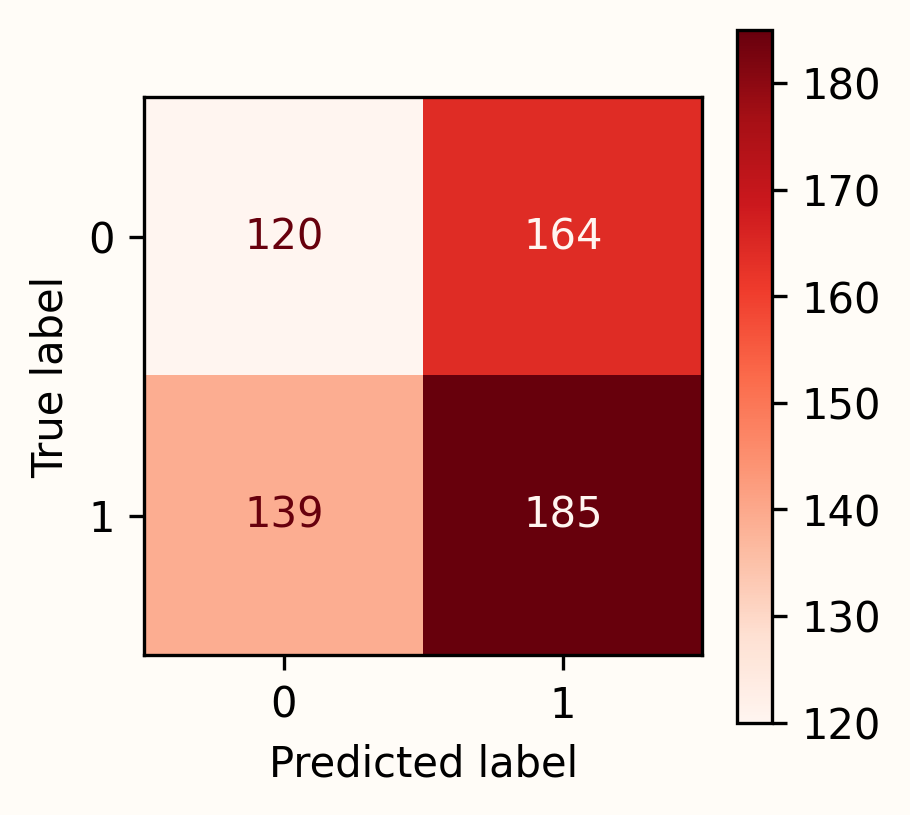

In [17]:
fig, ax = plt.subplots(1,1, figsize=(3,3), dpi=300)
cm_val = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(cm_val, display_labels=rfc.classes_)
fig.set_facecolor('#FFFCF7')
ax.set_facecolor('#FFFCF7')
disp.plot(cmap='Reds', ax=ax)
#plt.savefig("../plots/ConfusionMatrixValidation_rfpng")

## Error Matrix

In [18]:
error_metric = pd.DataFrame({"Train":[accuracy_score(y_train, y_train_pred),f1_score(y_train,y_train_pred),
                                recall_score(y_train,y_train_pred),precision_score(y_train, y_train_pred),
                                cohen_kappa_score(y_train, y_train_pred)],
                                "Test":[accuracy_score(y_test, y_test_pred),f1_score(y_test,y_test_pred),
                                recall_score(y_test,  y_test_pred),precision_score(y_test, y_test_pred),
                                cohen_kappa_score(y_test, y_test_pred)],
                                "Val":[accuracy_score(y_val, y_val_pred),f1_score(y_val,y_val_pred),
                                recall_score(y_val,  y_val_pred),precision_score(y_val, y_val_pred),
                                cohen_kappa_score(y_val, y_val_pred)]},
                                index=["accuracy","F1","recall","precission","kappa"])

In [19]:
error_metric

,Train,Test,Val
accuracy,1.0,0.489031,0.501645
F1,1.0,0.548100,0.549777
recall,1.0,0.598940,0.570988
precission,1.0,0.505216,0.530086
kappa,1.0,-0.030049,-0.006513


# Grid Search CV

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
grid = {'n_estimators': [50,100,150,200,250],
        'max_depth': [5,10,20,30,40],
        'min_samples_split': [2,10,20,30],
        'min_samples_leaf': [10,20]}

In [22]:
grid_search = GridSearchCV(estimator = rfc, param_grid = grid, cv = 5, n_jobs=-1, verbose=1)

In [23]:
grid_search.fit(X_train, y_train['direction']) #

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 30, 40],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [2, 10, 20, 30],
                         'n_estimators': [50, 100, 150, 200, 250]},
             verbose=1)

In [24]:
grid_search.best_params_

{'max_depth': 30,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 250}

In [25]:
grid_search.best_estimator_.score(X_test, y_test)

0.5

# Cross Validation

In [26]:
rfc_gridsearch = RandomForestClassifier(**grid_search.best_params_)

rfc_gridsearch.fit(X_train, y_train['direction'])

RandomForestClassifier(max_depth=30, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=250)

In [27]:
from sklearn.model_selection import cross_validate
results = cross_validate(rfc_gridsearch, X_train, y_train['direction'], cv = 10, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    9.7s remaining:   14.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.4s finished


In [28]:
results['test_score'].mean()

0.4903169179649541

In [29]:
imp = rfc_gridsearch.feature_importances_.tolist()
name = rfc_gridsearch.feature_names_in_.tolist()
pd.DataFrame({'name':name,'importances':imp}).sort_values('importances', ascending=False).head(10)

,name,importances
0,volume,0.050108
8,BBP_7_2.0,0.042656
5,BBB_3_2.0,0.042017
18,cmf_14,0.041393
17,cmf_7,0.041365
7,BBB_7_2.0,0.041257
2,rsi_3,0.039753
10,BBP_14_2.0,0.039250
16,cmf_3,0.038838
6,BBP_3_2.0,0.037702


# Error Matrix

In [30]:
y_train_pred = rfc_gridsearch.predict(X_train)
y_test_pred  = rfc_gridsearch.predict(X_test)
y_val_pred  = rfc_gridsearch.predict(X_val)

##  Confusion Matrix Train Set

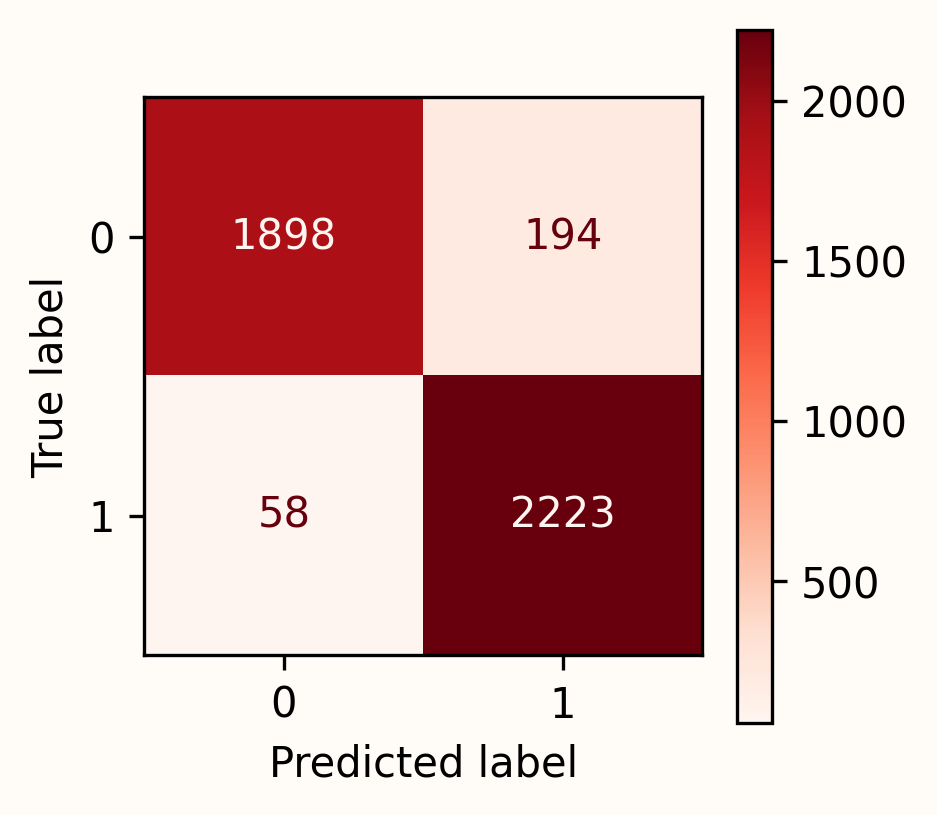

In [31]:
fig, ax = plt.subplots(1,1, figsize=(3,3), dpi=300)
cm_train = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(cm_train, display_labels=['0','1'])
fig.set_facecolor('#FFFCF7')
ax.set_facecolor('#FFFCF7')
disp.plot(cmap='Reds', ax=ax)
plt.savefig("../plots/ConfusionMatrixTrain_rf.png")

## Confusion Matrix Test Set

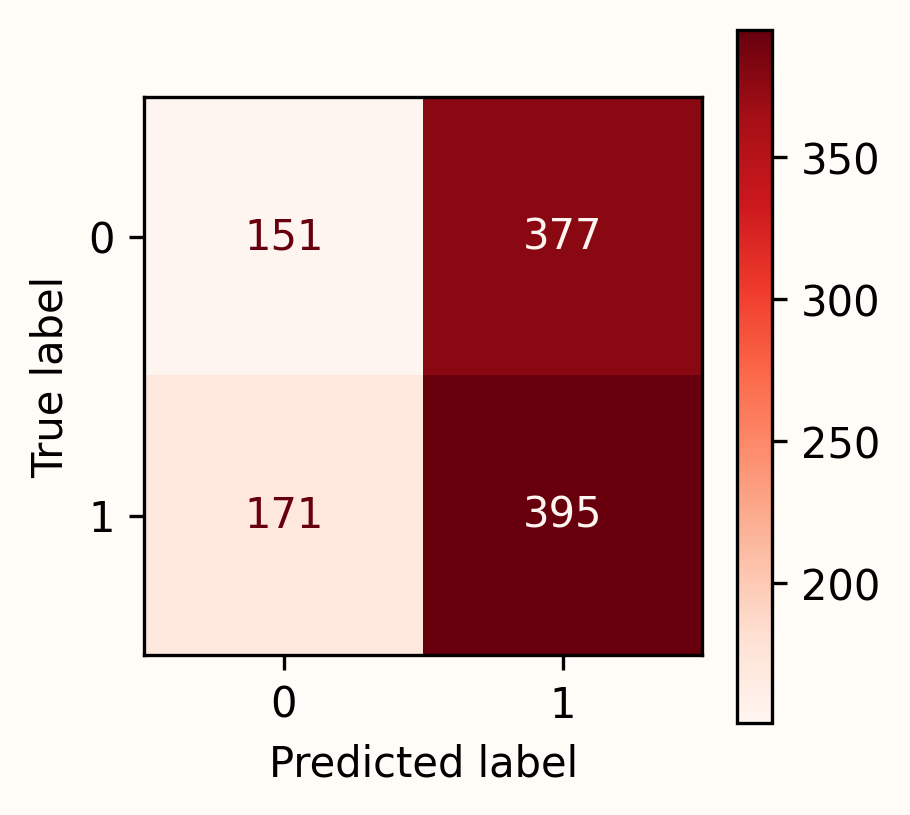

In [32]:
fig, ax = plt.subplots(1,1, figsize=(3,3), dpi=300)
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm_test, display_labels=['0','1'])
fig.set_facecolor('#FFFCF7')
ax.set_facecolor('#FFFCF7')
disp.plot(cmap='Reds', ax=ax)
plt.savefig("../plots/ConfusionMatrixTest_rf.png")

## Confusion Matrix Validation Set

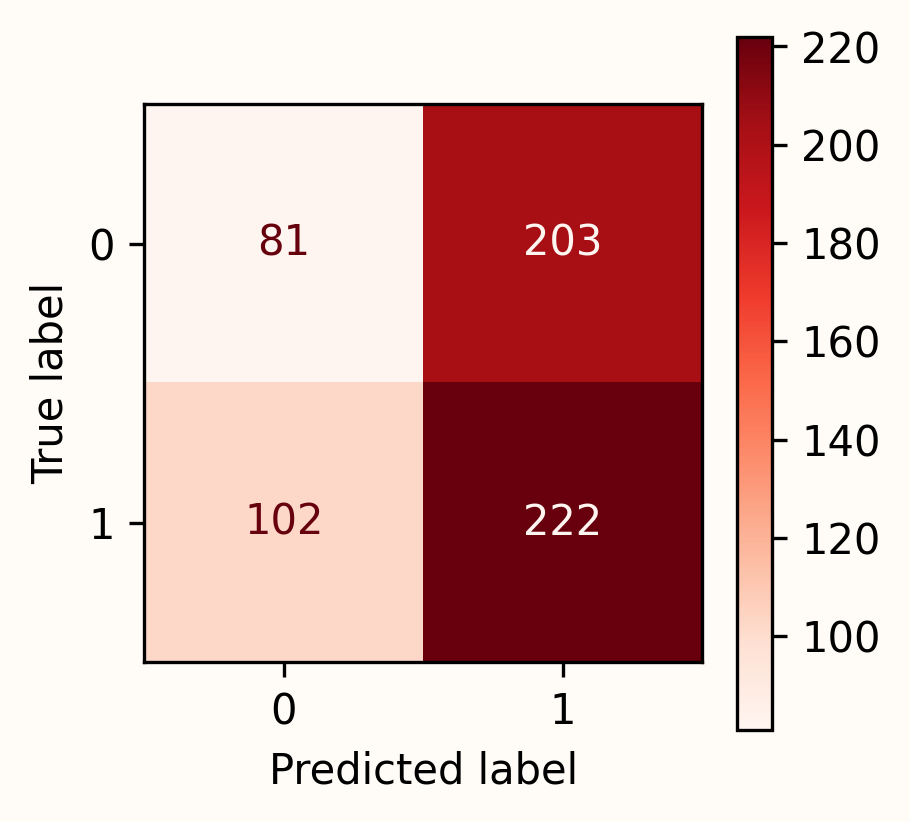

In [33]:
fig, ax = plt.subplots(1,1, figsize=(3,3), dpi=300)
cm_val = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(cm_val, display_labels=['0','1'])
fig.set_facecolor('#FFFCF7')
ax.set_facecolor('#FFFCF7')
disp.plot(cmap='Reds', ax=ax)
plt.savefig("../plots/ConfusionMatrixValidation_rf.png")

In [34]:
error_metric = pd.DataFrame({"Train":[accuracy_score(y_train, y_train_pred),f1_score(y_train,y_train_pred),
                                recall_score(y_train,y_train_pred),precision_score(y_train, y_train_pred),
                                cohen_kappa_score(y_train, y_train_pred)],
                                "Test":[accuracy_score(y_test, y_test_pred),f1_score(y_test,y_test_pred),
                                recall_score(y_test,  y_test_pred),precision_score(y_test, y_test_pred),
                                cohen_kappa_score(y_test, y_test_pred)],
                                "Val":[accuracy_score(y_val, y_val_pred),f1_score(y_val,y_val_pred),
                                recall_score(y_val,  y_val_pred),precision_score(y_val, y_val_pred),
                                cohen_kappa_score(y_val, y_val_pred)]},
                                index=["accuracy","F1","recall","precission","kappa"])

In [35]:
error_metric

,Train,Test,Val
accuracy,0.942374,0.499086,0.498355
F1,0.946360,0.590433,0.592790
recall,0.974573,0.697880,0.685185
precission,0.919735,0.511658,0.522353
kappa,0.884220,-0.016349,-0.030268


# Export

In [36]:
today = date.today()
model_name = 'random_forest'
description = 'with_feature_selection_with_GridSearch'

In [37]:
error_metric.to_csv('../data/results/error_metric_{}_{}_{}.csv'.format(model_name,description,today))